In [1]:
from wann_genetic.tools import ExperimentSeries
from itertools import combinations
from util import accuracy_swarmplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

2.0 0.3333333333333333
0.6531258267231771 0.2829181996152534


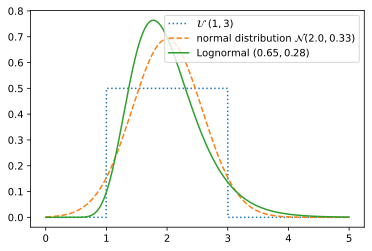

In [3]:
x = np.linspace(0.0001, 5, 1000)

a, b = 1,3

uniform = 1 / (b - a) * ((a <= x) & (x < b))
plt.plot(x, uniform, ':', label=f'$\mathcal{{U}}\ ({a},{b})$')


mean = (a+b)/2
variance = (b-a)**2 / 12

print(mean, variance)

normal = 1/np.sqrt(2*np.pi*variance) * np.exp(- (x-mean)**2/(2*variance))
plt.plot(x, normal, '--', label=f'normal distribution $\mathcal{{N}}({mean:0.2},{variance:0.2})$')

mu_tilde = np.log((mean**2) / np.sqrt(variance + (mean**2)))
sigma_tilde = np.sqrt(np.log(1 + variance/(mean**2)))
print (mu_tilde, sigma_tilde)

lognormal = 1/(sigma_tilde * x * np.sqrt(2 * np.pi)) * np.exp( - (np.log(x) - mu_tilde)**2 / (2 * sigma_tilde**2))
plt.plot(x, lognormal, '-', label=f'$\mathrm{{Lognormal}}\ ({mu_tilde:0.2}, {sigma_tilde:0.2})$')
plt.legend()
plt.show()

In [4]:
data_dir = "../data/01_d_iris_dist_comparison"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats()
series.var_names()

odict_keys(['distribution', 'seed'])

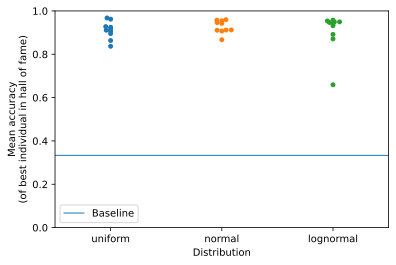

In [5]:
accuracy_swarmplot(data=df, x="distribution/distribution", xlabel="Distribution")

In [6]:
selectors = dict(
    uniform=df['distribution/distribution'] == 'uniform',
    normal=df['distribution/distribution'] == 'normal',
    lognormal=df['distribution/distribution'] == 'lognormal',
)

for a,b in combinations(selectors.items(), 2):
    ka, va = a
    kb, vb = b
    
    va = df[va]['MAX:accuracy.mean']
    vb = df[vb]['MAX:accuracy.mean']
    print (f"{ka} vs {kb} : best mean accuracy - {va.mean()} vs. {vb.mean()}")
    from scipy.stats import ttest_ind
    t, p = ttest_ind(va, vb, equal_var=False)
    print (t, p)
    print()
    
for k,v in selectors.items():
    v = df[v]['MAX:accuracy.mean']
    print (f"{k} - {v.mean():.2f} \pm {v.std():.2f}")

uniform vs normal : best mean accuracy - 0.9112666666666666 vs. 0.9270666666666667
-1.0026992049812817 0.3303378127402542

uniform vs lognormal : best mean accuracy - 0.9112666666666666 vs. 0.9052333333333333
0.1919641129831077 0.8508943376543302

normal vs lognormal : best mean accuracy - 0.9270666666666667 vs. 0.9052333333333333
0.720708603499421 0.4862398964905681

uniform - 0.91 \pm 0.04
normal - 0.93 \pm 0.03
lognormal - 0.91 \pm 0.09


In [7]:
print(series.hyperparam_table(tablefmt='grid'))

+----------------------------------------------------+--------------------------------------+
| Parameter                                          | Value                                |
+====================================================+======================================+
| Population size                                    | 100                                  |
+----------------------------------------------------+--------------------------------------+
| Number of generations                              | 200                                  |
+----------------------------------------------------+--------------------------------------+
| Initial population                                 | fully connected                      |
|                                                    | (edges have 5% chance of             |
|                                                    | being enabled)                       |
+----------------------------------------------------+------